In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path

In [31]:
def truncate(value):
    if (value < 0):
        return 0
    if (value > 255):
        return 255
    return value

def Brightness(img, bright):
    img = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, b, g = img[i,j]
            _r = truncate(r + bright)
            _b = truncate(b + bright)
            _g = truncate(g + bright)
            img[i,j] = (_r, _b, _g)
    return img


In [32]:
def Contrast(img, contrast):
    img = np.array(img)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, b, g = img[i,j]
            _r = int(truncate(factor * (r  - 128) + 128))
            _b = int(truncate(factor * (b  - 128) + 128))
            _g = int(truncate(factor * (g  - 128) + 128))
            img[i,j] = (_r, _b, _g)
    return img

In [33]:
def Stack2image(img,img1):
    img = np.array(img)
    img1 = np.array(img1)
    return np.clip(img + img1,0,255)

In [34]:
def FlipDown(img):
    img = np.array(img)
    return img[::-1]


def FlipLeft(img):
    img = np.array(img)
    return img[:,::-1,...]

In [35]:
def Grayscale1(img):
    img = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, b, g = img[i,j]
            GrayValue = int(r * 0.3 + b * 0.59 + g * 0.11)
            img[i][j] = GrayValue
    return img

def Grayscale2(img):
    img = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, b, g = img[i,j]
            GrayValue = int((r + b + g) / 3)
            img[i][j] = GrayValue
    return img

In [36]:
def Blur(img, BlurLevel):
    img = np.array(img)
    for t in range(BlurLevel):
        for i in range(img.shape[0] - 1):
            for j in range(img.shape[1] - 1):
                r, b, g = img[i,j]
                BlurValue = (img[i-1,j-1]/9 + img[i,j-1]/9 + img[i+1,j-1]/9 + img[i-1,j]/9 + img[i,j]/9 + img[i+1,j]/9 + img[i-1,j+1]/9 + img[i,j+1]/9 +img[i+1,j+1]/9 ).astype(int)
                img[i,j] = BlurValue
    return img

In [37]:
def Circle(img):
    img = np.array(img)
    x = int(img.shape[0]/2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if((i - x)**2 + (j - x)**2 >= x**2):
                img[i][j] = 0
    return img

In [38]:
def Elip(image):
    COS = SIN = np.cos(45)
    img = np.array(image)
    x = int(img.shape[0]/2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if ((i - x)*COS + (j - x) * SIN)**2 /(x*x) + ((i - x)*SIN - (j - x)*COS)**2 /((x/2)**2) > 1:
                if ((i - x)*COS + (j - x) * SIN)**2 /((x/2)**2) + ((i - x)*SIN - (j - x)*COS)**2 /(x*x) > 1:
                    img[i][j]=0
    return img

In [47]:
def One():
    s = input("Input your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    brightness = int(input("Input brightness: "))
    img = Image.open(s)
    img1 = Brightness(img, brightness)
    plt.imshow(img1)     
    print("Successful conversion!")
    return img1

def Two():
    s = input("Input your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    contrast = int(input("Input contrast: "))
    img = Image.open(s)
    img1 = Contrast(img, contrast)
    plt.imshow(img1)     
    print("Successful conversion!")
    return img1


def Three():
    print("Choice 1. Grayscale1")
    print("Choice 2. Grayscale2")
    choice = int(input("Enter your choice: "))
    while (True):
        if choice == 1:
            s = input("Input your image file: ")
            r = os.path.exists(s)
            while True:
                if r == True:
                    break
                s = input('File does not exist! Please re-enter:')
                r = os.path.exists(s)
            img = Image.open(s)
            img1 = Grayscale1(img)
            plt.imshow(img1)     
            print("Successful conversion!")
            break
        if choice == 2:
            s = input("Input your image file: ")
            r = os.path.exists(s)
            while True:
                if r == True:
                    break
                s = input('File does not exist! Please re-enter:')
                r = os.path.exists(s)
            img = Image.open(s)
            img1 = Grayscale2(img)
            plt.imshow(img1)     
            print("Successful conversion!")
            break
        print("Choice 1. If you want to flip the image horizontally")
        print("Choice 2. If you want to flip the image vertically")
        choice = int(input("Syntax error! Please re-enter: "))
    return img1


def Four():
    print("Choice 1. If you want to flip the image horizontally")
    print("Choice 2. If you want to flip the image vertically")
    choice = int(input("Enter your choice: "))
    while (True):
        if choice == 1:
            s = input("Input your image file: ")
            r = os.path.exists(s)
            while True:
                if r == True:
                    break
                s = input('File does not exist! Please re-enter:')
                r = os.path.exists(s)
            img = Image.open(s)
            img1 = FlipLeft(img)
            plt.imshow(img1)     
            print("Successful conversion!")
            break
        if choice == 2:
            s = input("Input your image file: ")
            r = os.path.exists(s)
            while True:
                if r == True:
                    break
                s = input('File does not exist! Please re-enter:')
                r = os.path.exists(s)
            img = Image.open(s)
            img1 = FlipDown(img)
            plt.imshow(img1)     
            print("Successful conversion!")
            break
        print("Choice 1. If you want to flip the image horizontally")
        print("Choice 2. If you want to flip the image vertically")
        choice = int(input("Syntax error! Please re-enter: "))
    return img1


def Five():
    s = input("Input your image file 1: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    img = Image.open(s)
    a = input("Input your image file 2: ")
    b = os.path.exists(a)
    while True:
        if r == True:
            break
        a = input('File does not exist! Please re-enter:')
        b = os.path.exists(a)
    img1 = Image.open(s)
    img2 = Image.open(a)
    img = Stack2image(img1,img2)
    plt.imshow(img)     
    print("Successful conversion!")
    return img

def Six():
    s = input("Input your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    BlurLevel = int(input("Input BlurLevel: "))
    img = Image.open(s)
    img1 = Blur(img, BlurLevel)
    plt.imshow(img1)     
    print("Successful conversion!")
    return img1

def Seven():
    s = input("Input your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    img = Image.open(s)
    img1 = Circle(img)
    plt.imshow(img1)     
    print("Successful conversion!")
    return img1

def Eight():
    s = input("Input your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    img = Image.open(s)
    img1 = Elip(img)
    plt.imshow(img1)     
    print("Successful conversion!")
    return img1

def Zero():
    print("Change image brightness")
    img1 =  One()
    plt.imsave('Brightness.png',img1)
    print("successfully saved with name: Brightness.png")
    
    print("Change image contrast")
    img2 =  Two()
    plt.imsave('Contrast.png',img2)
    print("successfully saved with name: Contrast.png")
    
    print("Convert RGB images to grayscale images")
    img3 =  Three()
    plt.imsave('Grayscale.png',img3)
    print("successfully saved with name: Grayscale.png")
    
    print("Flip the image horizontally or flip the image vertically")
    img4 =  Four()
    plt.imsave('Flip.png',img4)
    print("successfully saved with name: Flip.png")  
    
    print("Stack 2 image of the same size")
    img5 =  Five()
    plt.imsave('Stackimage.png',img5)
    print("successfully saved with name: Stackimage.png") 
    
    print("Blur image")
    img6 =  Six()
    plt.imsave('Blur.png',img6)
    print("successfully saved with name: Blur.png")   
    
    print("Crop the content of the image according to the applied frame with the frame being a circle")
    img7 =  Seven()
    plt.imsave('Circle.png',img7)
    print("successfully saved with name: Circlr.png")   
    
    print("Crop the content of the image according to the applied frame with the frame being a elip")
    img8 =  Eight()
    plt.imsave('Elip.png',img8)
    print("successfully saved with name: Elip.png")   
     
    return

In [48]:
def main():
    print("Choice 1. Change image brightness")
    print("Choice 2. Change image contrast")
    print("Choice 3. Convert RGB images to grayscale images")
    print("Choice 4. Flip the image horizontally or flip the image vertically")
    print("Choice 5. Stack 2 image of the same size")
    print("Choice 6. Blur image")
    print("Choice 7. Crop the content of the image according to the applied frame with the frame being a circle")
    print("Choice 8. Crop the content of the image according to the applied frame with the frame being a elip")
    print("Choice 0. perform all functions")
    choice = int(input("Enter your choice: "))
    while (True):
        if choice == 1:
            One()
            break
        if choice == 2:
            Two()
            break
        if choice == 3:
            Three()
            break
        if choice == 4:
            Four()
            break
        if choice == 5:
            Five()
            break
        if choice == 6:
            Six()
            break
        if choice == 7:
            Seven()
            break
        if choice == 8:
            Eight()
            break
        if choice == 0:
            Zero()
            break
        print("Choice 1. Change image brightness")
        print("Choice 2. Change image contrast")
        print("Choice 3. Convert RGB images to grayscale images")
        print("Choice 4. Flip the image horizontally or flip the image vertically")
        print("Choice 5. Stack 2 image of the same size")
        print("Choice 6. Blur image")
        print("Choice 7. Crop the content of the image according to the applied frame with the frame being a circle")
        print("Choice 8. Crop the content of the image according to the applied frame with the frame being a elip")
        print("Choice 0. perform all functions")
        choice = int(input("Syntax error! Please re-enter: "))
   
    print("Your results:")

Choice 1. Change image brightness
Choice 2. Change image contrast
Choice 3. Convert RGB images to grayscale images
Choice 4. Flip the image horizontally or flip the image vertically
Choice 5. Stack 2 image of the same size
Choice 6. Blur image
Choice 7. Crop the content of the image according to the applied frame with the frame being a circle
Choice 8. Crop the content of the image according to the applied frame with the frame being a elip
Choice 0. perform all functions
Enter your choice: 8
Input your image file: lena.png
Successful conversion!
Your results:


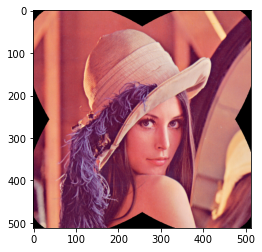

In [49]:
if __name__ == '__main__':
    main()